# Titanic Analysis
## @author = David Noble Morris, 01/25/2023

My submission for the entry-level kaggle competition, taken with the motive of gaining team collaboration rights. The objective is to train a simple classifier that can predict what features enabled one to survive for the sinking of the S.S. Titanic.

### Data Definition

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex | |	
|Age | Age in years |	|
sibsp |	# of siblings / spouses aboard the Titanic	
parch |	# of parents / children aboard the Titanic	
ticket |	Ticket number	
fare |	Passenger fare	
cabin |	Cabin number	
embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton


#### Variable Notes
**pclass**: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Initial data setup

To ease cleaning, I'm going to combine the training and test set, clean them both at once, then reseperate them. 

In [4]:
dataPath="./data"

genderPath=dataPath+"\\gender_submission.csv"
trainPath=dataPath+"\\train.csv"
testPath=dataPath+"\\test.csv"

In [5]:
import pandas as pd
import numpy as np

genderData=pd.read_csv(genderPath)
genderData

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
trainData=pd.read_csv(trainPath)
trainData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
testData=pd.read_csv(testPath)
testData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
#combine the data  
data = pd.concat([trainData, testData], sort=False)

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Missing Values Check

In [10]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Fill in for Missing Values - Age, Fare, Cabin, and Embarked
For age and fare, we'll take the median age and randomly fill it + or - the standard deviation.
We'll replace the Cabin and Embarked NaN values with dummy data. In this case, we'll just substitute NaN for "U" or "Unknown". 

Finally, we'll encode the categorical data into numbers more pliable for mathematics.

In [11]:
print(data["Age"].std())
print(data["Age"].median())

14.413493211271334
28.0


In [12]:
#filling for age
median_age = data['Age'].median()
std_dev = data['Age'].std()

for i in data[data['Age'].isnull()].index:
    data.at[i,'Age'] = median_age + np.random.normal(0,std_dev)

#Fare
median_fare = data['Fare'].median()
std_devf = data['Fare'].std()

for i in data[data['Fare'].isnull()].index:
    data.at[i,'Fare'] = median_fare + np.random.normal(0,std_devf)


In [13]:
# Cabin, Embarked
data["Cabin"].fillna("Unknown", inplace=True)
data["Embarked"].fillna("Unknown", inplace=True)

### Encoding Categorical Data

In [14]:
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [15]:
data["Embarked"].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [16]:
print(len(data["Cabin"].unique()))
data["Cabin"].unique()


187


array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [17]:
#map the Sex data to numeric
sex_map = {'male':0, 'female':1}
data['Sex_encoded'] = data['Sex'].map(sex_map)

In [18]:
#map the categorical data to numeric
embarked_map = {"S": 1, "C": 2, "Q": 3, "Unknown": 4}
data['Embarked_encoded'] = data['Embarked'].map(embarked_map)



In [19]:
#map the cabin data to numeric using ordinal encoding
#map the cabin data to numeric
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()
data['cabin_ordinal'] = ordinal_encoder.fit_transform(data[["Cabin"]])


In [20]:
data['Sex_encoded'].unique()

array([0, 1], dtype=int64)

In [21]:
data['Embarked_encoded'].unique()

array([1, 2, 3, 4], dtype=int64)

In [22]:
print(len(data["cabin_ordinal"].unique()))
data['cabin_ordinal'].unique()

187


array([186., 106.,  70., 163., 184.,  62., 143.,  17.,  80.,  54., 129.,
        32.,  92.,  30., 105., 181., 179., 154.,  16., 118., 126.,  66.,
        48., 148., 177., 139.,  58., 180.,  78., 155.,  25.,  18.,  89.,
       183.,  13.,  38.,  56.,  12., 132., 120., 113., 102., 131., 108.,
        53., 170.,  59.,  72., 116.,  69., 145.,   5.,  42., 117.,  79.,
        65.,  98., 157.,  94.,  47., 100., 156.,  84.,  24.,  71., 111.,
       160., 185.,  74., 133.,  33., 165., 104.,  60., 147., 161.,  14.,
        63.,  67., 112., 158., 124., 149., 169.,   2.,  35.,  82., 123.,
        55., 153., 138.,  52., 114.,  36.,  37.,  27., 107., 101.,   3.,
        61.,  99.,   0., 171.,  39.,   6., 122., 142., 146.,   8.,  44.,
        10., 140., 167.,  73.,  51.,  45., 141.,  43.,  26., 178.,  97.,
       152., 110.,  86., 173.,  21., 137.,  87., 128., 150., 119., 172.,
       182.,  31., 144.,  57., 121.,  15.,  22.,  50., 164.,  88., 127.,
       151.,   9.,  90.,  40.,  77.,  41.,  34.,   

In [23]:
data.isnull().sum()

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin                 0
Embarked              0
Sex_encoded           0
Embarked_encoded      0
cabin_ordinal         0
dtype: int64

In [24]:
#reseperate the train and test data, now that everything is cleaned.
trainData=data[0:891]
testData=data[891:]

## Model Training

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(trainData.drop(['Survived'], axis=1), trainData['Survived'], test_size=0.2, random_state=42)

In [27]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded,cabin_ordinal
331,332,1,"Partner, Mr. Austen",male,45.500000,0,0,113043,28.5000,C124,S,0,1,71.0
733,734,2,"Berriman, Mr. William John",male,23.000000,0,0,28425,13.0000,Unknown,S,0,1,186.0
382,383,3,"Tikkanen, Mr. Juho",male,33.028523,0,0,STON/O 2. 3101293,7.9250,Unknown,S,0,1,186.0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.000000,1,0,350025,7.8542,Unknown,S,0,1,186.0
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.000000,4,2,347082,31.2750,Unknown,S,1,1,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,343120,7.6500,Unknown,S,1,1,186.0
270,271,1,"Cairns, Mr. Alexander",male,32.156520,0,0,113798,31.0000,Unknown,S,0,1,186.0
860,861,3,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.1083,Unknown,S,0,1,186.0
435,436,1,"Carter, Miss. Lucile Polk",female,14.000000,1,2,113760,120.0000,B96 B98,S,1,1,60.0


## Feature Selection 
Intuition tells me that Pclass, Sex, Age, SibSp, Parch, Fare will play a role in predicting who survived.

Intuitively I had to wonder however: Would the "Cabin" or "Embarked" feature even matter? You'd think the crewmates in charge of the reservation of lifeboat seating will be persuaded by factors other than "when did you board the ship" or "what kind of room were you in?" 

There are so many unique values for Cabin alone, and unless people were trying to hunker into certain types to rooms thinking it'd help them survive (somehow), it's probably just noise?

Let's do a quick check.

### H0 = Features Pclass, Sex, Age, SibSp, Parch, Fare provide the best predictors. 
This will be repeated with a second feature set that includes Cabin Scores.

In [28]:
features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare']
features

['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare']

In [29]:
X_train[features]

,Pclass,Sex_encoded,Age,SibSp,Parch,Fare
331,1,0,45.500000,0,0,28.5000
733,2,0,23.000000,0,0,13.0000
382,3,0,33.028523,0,0,7.9250
704,3,0,26.000000,1,0,7.8542
813,3,1,6.000000,4,2,31.2750
...,...,...,...,...,...,...
106,3,1,21.000000,0,0,7.6500
270,1,0,32.156520,0,0,31.0000
860,3,0,41.000000,2,0,14.1083
435,1,1,14.000000,1,2,120.0000


In [30]:
#construct the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf=DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train[features], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [31]:
#predict the test data
y_pred = clf.predict(X_test[features])

In [32]:
#check the accuracy
accuracy_score(y_test, y_pred)

0.7932960893854749

### Halpha=Cabin feature improves accuracy

In [33]:
features = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded', 'cabin_ordinal' ]
features

['Pclass',
 'Sex_encoded',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_encoded',
 'cabin_ordinal']

In [34]:
X_train[features]

,Pclass,Sex_encoded,Age,SibSp,Parch,Fare,Embarked_encoded,cabin_ordinal
331,1,0,45.500000,0,0,28.5000,1,71.0
733,2,0,23.000000,0,0,13.0000,1,186.0
382,3,0,33.028523,0,0,7.9250,1,186.0
704,3,0,26.000000,1,0,7.8542,1,186.0
813,3,1,6.000000,4,2,31.2750,1,186.0
...,...,...,...,...,...,...,...,...
106,3,1,21.000000,0,0,7.6500,1,186.0
270,1,0,32.156520,0,0,31.0000,1,186.0
860,3,0,41.000000,2,0,14.1083,1,186.0
435,1,1,14.000000,1,2,120.0000,1,60.0


In [35]:
#Check the accuracy now that we have expanded the feature set
clf=DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train[features], y_train)

#predict the test data
y_pred = clf.predict(X_test[features])
#check the accuracy
accuracy_score(y_test, y_pred)

0.7932960893854749

Literally NO change in accuracy. Reject Halpha. Just affirms that where you embarked from or your cabin type really doesn't mean anything, so we cleaned up missing values for those columns for nothing directly beneficial. I don't think we need to go further into a formal p-valuation to affirm this. We're getting roughly 80% accuracy regardless. 

All the same, wouldn't hurt to just leave it around seeing as we cleaned those columns up? Who knows, *maybe* it could come clutch useful if we wanted to dive deeper into precision and recall analysis, or ask a fundamentally different prediction question. 

For the kaggle entry competition, and in the interest of timeliness (so I can move forward with other competitions), I am limiting my scope to merely a quick insight on predictive accuracy. 


# Final Correlation Conclusions

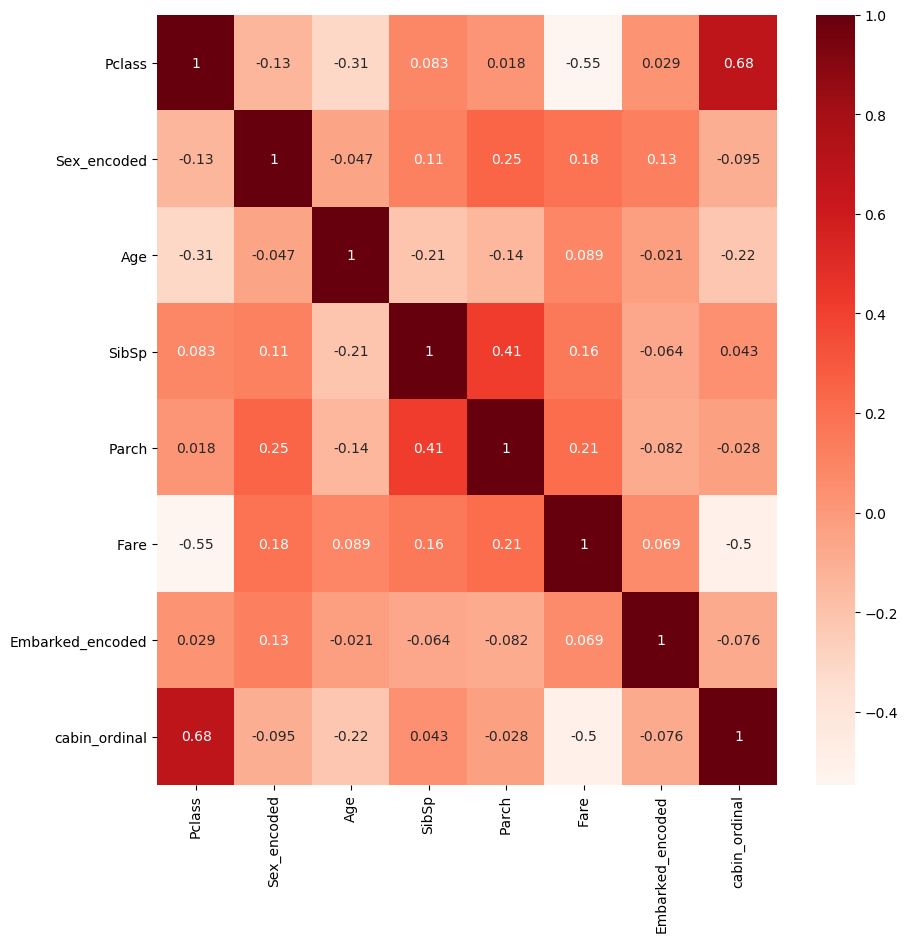

In [36]:
#find correlation between features for the "Survived column"
import seaborn as sns
import matplotlib.pyplot as plt

corr = trainData[features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
corr_matrix = data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived            1.000000
Sex_encoded         0.543351
Fare                0.254727
Embarked_encoded    0.118026
Parch               0.081629
PassengerId        -0.005007
Age                -0.035005
SibSp              -0.035322
cabin_ordinal      -0.253406
Pclass             -0.338481
Name: Survived, dtype: float64

So based on the findings above...the higher your sex_encoded, aka, if you are female (since female was encoded as '1'), the more likely you were to survived. 54% correlation there.

On the other extreme, the higher your Pclass, the less likely you were to survive i.e. first-class ticket holders are predicted to be more likely to survive than second or third class. Roughly (negative) 34% correlation there.

In [39]:
# Output the predictions to a csv file
predictions = clf.predict(testData[features])

pd.DataFrame({'PassengerId': testData['PassengerId'], 'Survived': predictions}).to_csv('./data/predictions.csv', index=False)